In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
df = pd.read_csv('C:/Users/jyoti/Downloads/Titanic-Dataset.csv')

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_13568\2232895015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_13568\2232895015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [9]:
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [12]:
y_pred=model.predict(X_test)

In [13]:
print('Accuracy:',accuracy_score (y_test,y_pred))

Accuracy: 0.7988826815642458


In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [15]:
print("Conclusion:")
print("The Logistic Regression model achieved around 80% accuracy.")
print("The model performs well in predicting passenger survival on Titanic.")
print("Females and passengers in higher classes had a higher survival chance.")


Conclusion:
The Logistic Regression model achieved around 80% accuracy.
The model performs well in predicting passenger survival on Titanic.
Females and passengers in higher classes had a higher survival chance.


In [16]:
import numpy as np

importance = model.coef_[0]
for feature, imp in zip(X.columns, importance):
    print(f"{feature}: {imp:.4f}")


Pclass: -0.9582
Sex: 2.5815
Age: -0.0312
SibSp: -0.3029
Parch: -0.1005
Fare: 0.0029
Embarked: 0.2226


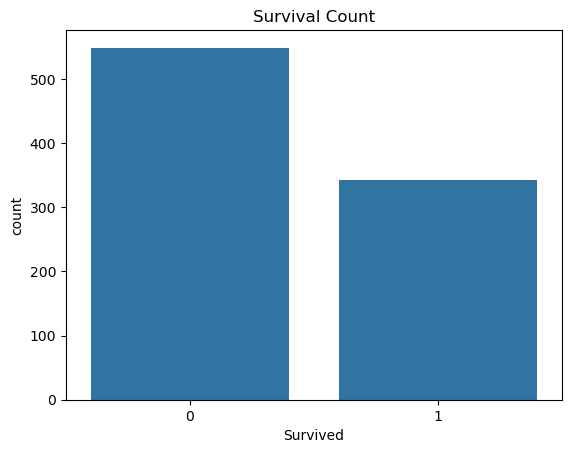

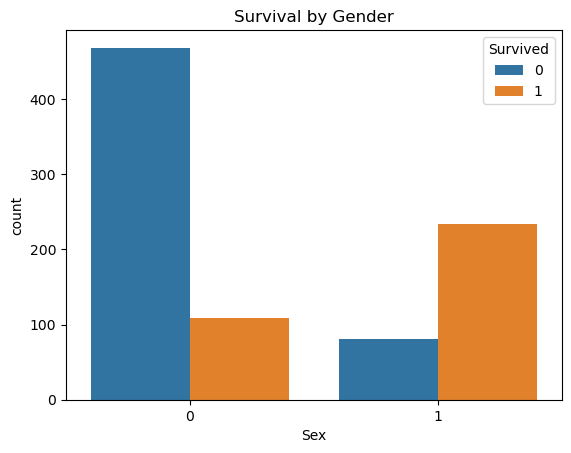

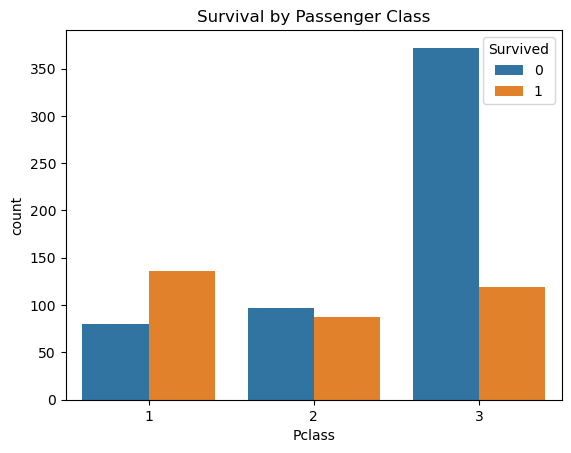

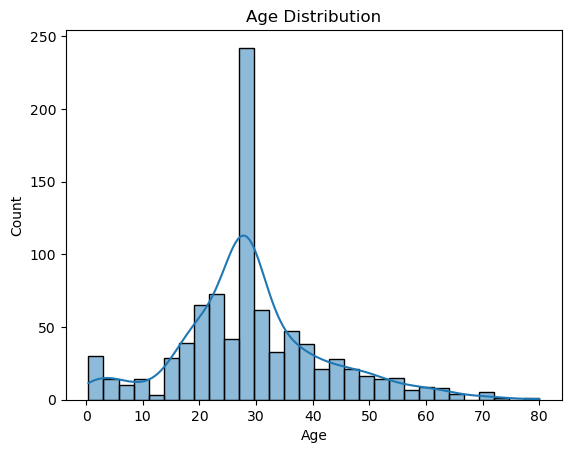

In [17]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
